### 1. Data Preprocessing

#### 1.1 Import the Dependencies

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix


#### 1.2 Import the Dataset

In [25]:
df=pd.read_csv("Brain Stroke.csv")

In [26]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [27]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


#### 1.3 EDA

In [28]:
df.shape

(4981, 11)

#### 1.4 Using LabelEncoder

In [29]:
le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])
df["ever_married"]=le.fit_transform(df["ever_married"])
df["work_type"]=le.fit_transform(df["work_type"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])
df["smoking_status"]=le.fit_transform(df["smoking_status"])

#### 1.5 Balancing the dataset

<Axes: xlabel='stroke', ylabel='count'>

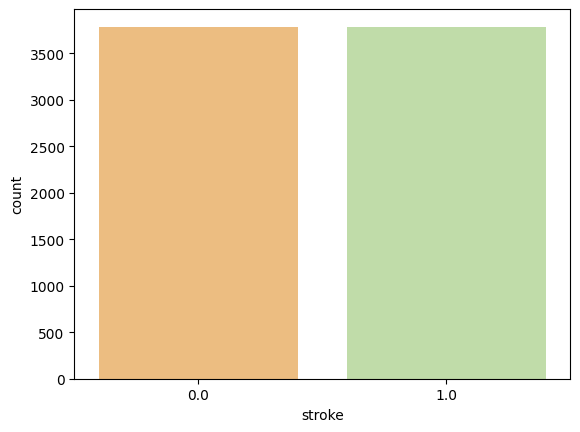

In [30]:
X = df.drop('stroke',axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42, shuffle=True)

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

frames = [X_train_smote, y_train_smote]
df1 = pd.concat(frames)

df1.rename(columns = {0:'stroke'}, inplace=True)

sns.countplot(df1, x='stroke', palette='Spectral')

#### 1.6 Feature Scaling

In [31]:
ss=StandardScaler()
X_scaled=ss.fit_transform(X_train_smote)

### 2. Model Building

#### 2.1 Splitting the Dataset

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y_train_smote,test_size=0.2,random_state=10)

#### 2.2 Random Forest

93.27
[[735  44]
 [ 58 678]]


<Axes: >

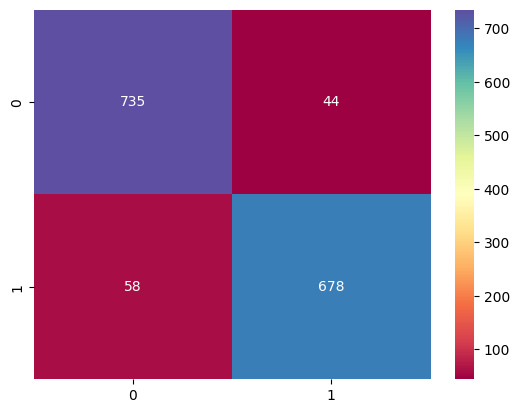

In [33]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
y_pred

ac = accuracy_score(y_test, y_pred)*100
print('{:.2f}'.format(ac))

cm = confusion_matrix(y_pred, y_test)
print(cm)

sns.heatmap(cm, annot=True, fmt='1', cmap='Spectral')

#### 2.3 Decision Tree

90.69
[[708  56]
 [ 85 666]]


<Axes: >

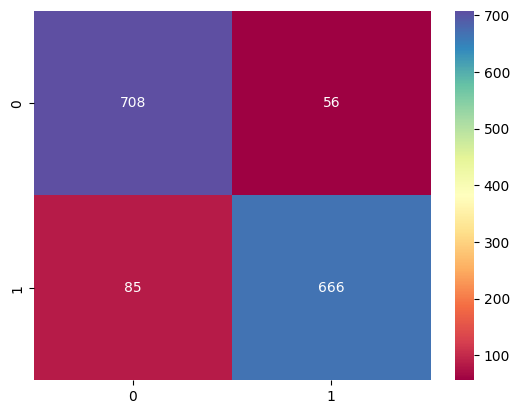

In [34]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred=dtc.predict(x_test)
y_pred

ac = accuracy_score(y_test, y_pred)*100
print('{:.2f}'.format(ac))

cm = confusion_matrix(y_pred, y_test)
print(cm)

sns.heatmap(cm, annot=True, fmt='1', cmap='Spectral')

#### 2.4 KNN

86.67
[[643  52]
 [150 670]]


<Axes: >

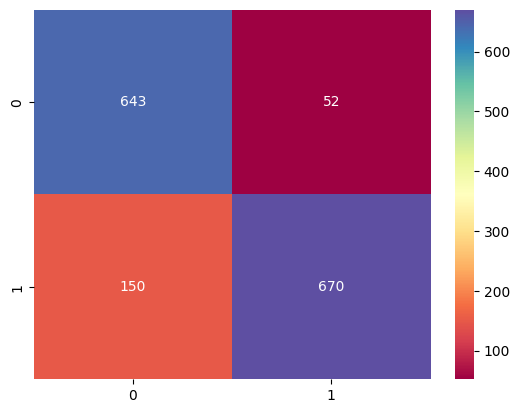

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

ac = accuracy_score(y_test, y_pred)*100
print('{:.2f}'.format(ac))

cm = confusion_matrix(y_pred, y_test)
print(cm)

sns.heatmap(cm, annot=True, fmt='1', cmap='Spectral')

#### 2.5 GradientBoosting

85.81
[[661  83]
 [132 639]]


<Axes: >

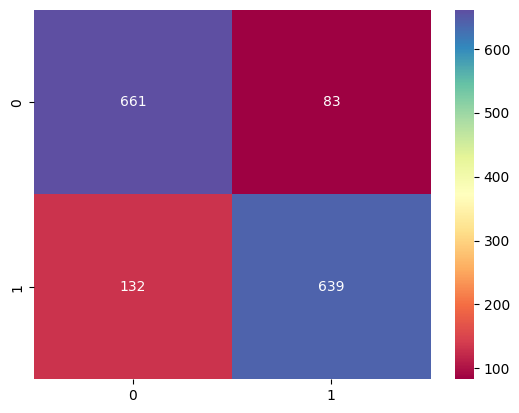

In [36]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(x_train, y_train)

y_pred = gbc.predict(x_test)
y_pred

ac = accuracy_score(y_test, y_pred)*100
print('{:.2f}'.format(ac))

cm = confusion_matrix(y_pred, y_test)
print(cm)

sns.heatmap(cm, annot=True, fmt='1', cmap='Spectral')

#### 2.6 XGBoost

93.66
[[741  44]
 [ 52 678]]


<Axes: >

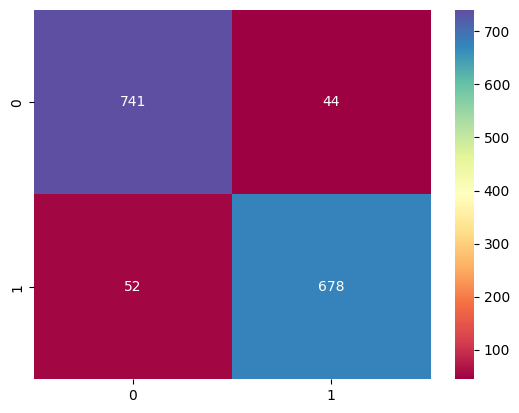

In [37]:
xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
y_pred

ac = accuracy_score(y_test, y_pred)*100
print('{:.2f}'.format(ac))

cm = confusion_matrix(y_pred, y_test)
print(cm)

sns.heatmap(cm, annot=True, fmt='1', cmap='Spectral')

### 3. Predictive Model

In [38]:
classifier = xgb.XGBClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
y_pred

ac = accuracy_score(y_test, y_pred)*100
print('{:.2f}'.format(ac))

93.66


In [43]:
predictive_input = np.asarray([[1,25, 1, 0, 1, 3, 1, 89.4, 32.7, 2]]).reshape(1, -1)
prediction = classifier.predict(predictive_input)
print('Prediction: ',prediction)

if(prediction[0]==1):
    print('Stroke')
else:
    print("No Stroke")

Prediction:  [0]
No Stroke


In [45]:
predictive_input = np.asarray([[0,56, 1, 1, 1, 1, 1, 189.4, 40, 3]]).reshape(1, -1)
prediction = classifier.predict(predictive_input)
print('Prediction: ',prediction)

if(prediction[0]==1):
    print('Stroke')
else:
    print("No Stroke")

Prediction:  [0]
No Stroke
